In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv("/Users/minindifonseka/Downloads/adult/adult_data2.csv")

In [67]:
df.shape

(32561, 15)

In [69]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     584
income               0
dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31977 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [73]:
df.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [75]:
df['workclass'] = df['workclass'].str.strip()
df['relationship'] = df['relationship'].str.strip()
df['sex'] = df['sex'].str.strip()
df['native_country'] = df['native_country'].str.strip()

In [77]:
# Strip leading/trailing spaces from the 'education' column
df['education'] = df['education'].str.strip()

# Apply the function to group certain education levels under 'Other'
def add_education(inpt):
    if inpt in ['10th', '7th-8th', 'Prof-school', '9th', '12th', 'Doctorate', '5th-6th', '1st-4th', 'Preschool']:
        return 'Other'
    else:
        return inpt

# Apply the function
df['education'] = df['education'].apply(add_education)

# Check the value counts
print(df['education'].value_counts())

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Other            4067
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
Name: count, dtype: int64


In [79]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [81]:
# Strip leading/trailing spaces from the 'education' column
df['workclass'] = df['workclass'].str.strip()

# Apply the function to group certain education levels under 'Other'
def add_gov(inpt):
    if inpt in ['Local-gov', 'State-gov', 'Federal-gov']:
        return 'Government'
    else:
        return inpt

def add_self(inpt):
    if inpt in ['Self-emp-not-inc', 'Self-emp-inc']:
        return 'Self Employeed'
    else:
        return inpt

def add_other(inpt):
    if inpt in ['Without-pay', 'Never-worked']:
        return 'Other'
    else:
        return inpt

# Apply the function
df['workclass'] = df['workclass'].apply(add_gov)
df['workclass'] = df['workclass'].apply(add_self)
df['workclass'] = df['workclass'].apply(add_other)

# Check the value counts
print(df['workclass'].value_counts())


workclass
Private           22696
Government         4351
Self Employeed     3657
Other                21
Name: count, dtype: int64


In [83]:
df['marital_status'].value_counts()

marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [85]:
# Strip leading/trailing spaces from the 'education' column
df['marital_status'] = df['marital_status'].str.strip()

# Apply the function to group certain education levels under 'Other'
def add_married(inpt):
    if inpt in ['Widowed', 'Married-spouse-absent', 'Married-AF-spouse', 'Married-civ-spouse']:
        return 'Married'
    else:
        return inpt

# Apply the function to group certain education levels under 'Other'
def add_unmarried(inpt):
    if inpt in ['Divorced', 'Separated', 'Never-married']:
        return 'Unmarried'
    else:
        return inpt

# Apply the function
df['marital_status'] = df['marital_status'].apply(add_married)
df['marital_status'] = df['marital_status'].apply(add_unmarried)

# Check the value counts
print(df['marital_status'].value_counts())

marital_status
Married      16410
Unmarried    16151
Name: count, dtype: int64


In [87]:
df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [89]:
# Strip leading/trailing spaces from the 'education' column
df['occupation'] = df['occupation'].str.strip()

# Apply the function to group certain education levels under 'Other'
def add_education(inpt):
    if inpt in ['Farming-fishing', 'Tech-support', 'Protective-serv', 'Priv-house-serv', 'Armed-Forces']:
        return 'Other'
    else:
        return inpt

# Apply the function
df['occupation'] = df['occupation'].apply(add_education)

# Check the value counts
print(df['occupation'].value_counts())

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Other                2729
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Name: count, dtype: int64


In [91]:
df['race'].value_counts()

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

In [93]:
# Strip leading/trailing spaces from the 'education' column
df['race'] = df['race'].str.strip()

# Apply the function to group certain education levels under 'Other'
def add_education(inpt):
    if inpt in ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Others']:
        return 'Other'
    else:
        return inpt

# Apply the function
df['race'] = df['race'].apply(add_education)

# Check the value counts
print(df['race'].value_counts())

race
White    27816
Black     3124
Other     1621
Name: count, dtype: int64


In [95]:
df['relationship'].value_counts()

relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

In [97]:
# Strip leading/trailing spaces from the 'education' column
df['relationship'] = df['relationship'].str.strip()

# Apply the function to group certain education levels under 'Other'
def add_education(inpt):
    if inpt in ['Own-child', 'Other-relative']:
        return 'Other'
    else:
        return inpt

# Apply the function
df['relationship'] = df['relationship'].apply(add_education)

# Check the value counts
print(df['relationship'].value_counts())

relationship
Husband          13193
Not-in-family     8305
Other             6049
Unmarried         3446
Wife              1568
Name: count, dtype: int64


In [99]:
df['native_country'].value_counts()

native_country
United-States                 29169
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [101]:
# Strip leading/trailing spaces from the 'education' column
df['native_country'] = df['native_country'].str.strip()

# Apply the function to group certain education levels under 'Other'
def categorize_country(country):
    if country in ['Cambodia', 'China', 'India', 'Iran', 'Japan', 'Laos', 'Philippines', 'Taiwan', 'Vietnam', 'Hong', 'Thailand']:
        return 'Asia'
    elif country in ['Canada', 'Cuba', 'Dominican-Republic', 'El-Salvador', 'Guatemala', 
                     'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 
                     'Outlying-US(Guam-USVI-etc)', 'Puerto-Rico', 'United-States', 'Haiti']:
        return 'North America'
    elif country in ['Columbia', 'Ecuador', 'Peru']:
        return 'South America'
    elif country in ['France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 
                     'Netherlands', 'Scotland', 'Yugoslavia', 'England', 'South', 'Poland', 'Portugal', 'Holand-Netherlands', 'Trinadad&Tobago']:
        return 'Europe'
    else:
        return country  # Return the original name if it doesn't match any category

# Apply the function to categorize countries
df['native_country'] = df['native_country'].apply(categorize_country)

# Check the value counts
print(df['native_country'].value_counts())

native_country
North America    30568
Asia               671
Europe             620
South America      118
Name: count, dtype: int64


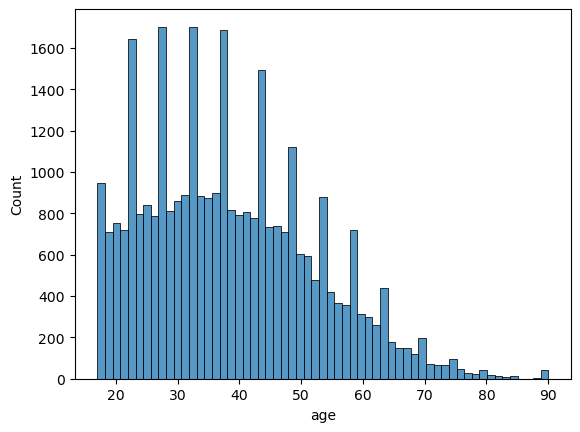

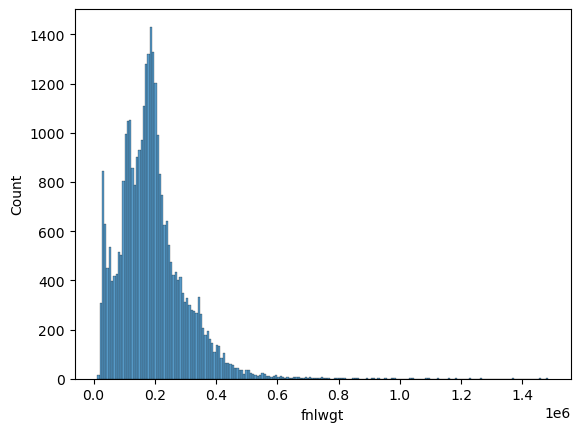

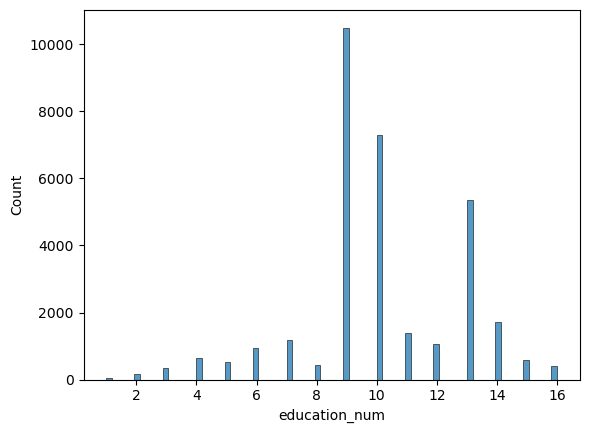

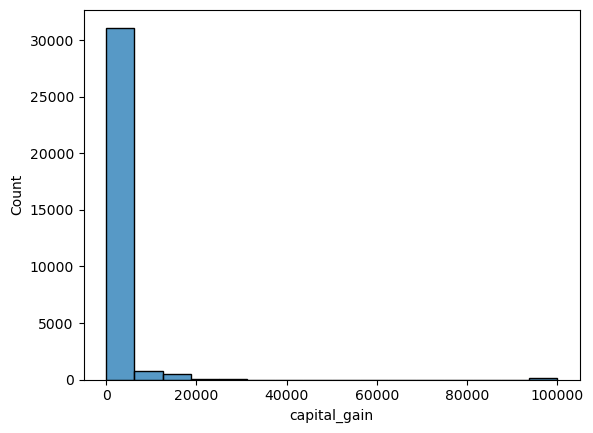

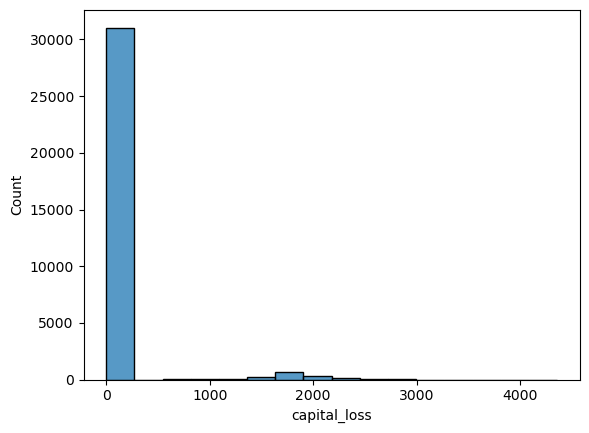

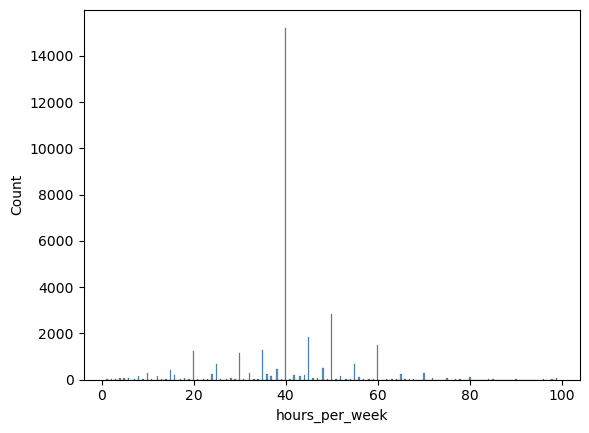

In [103]:
#histogram to identify the distribution
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include = "number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

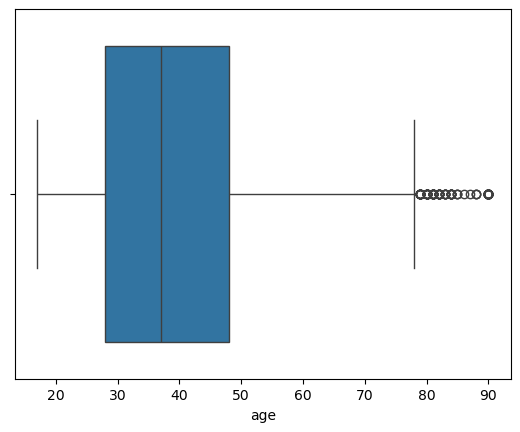

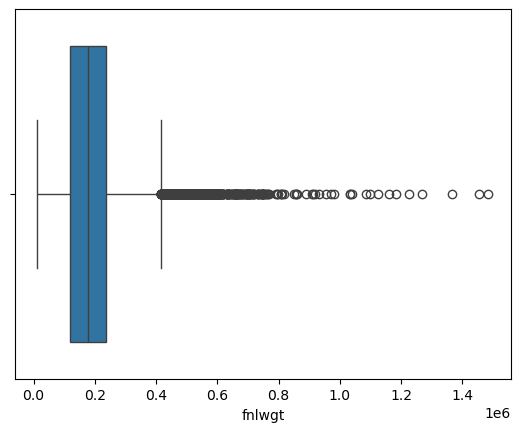

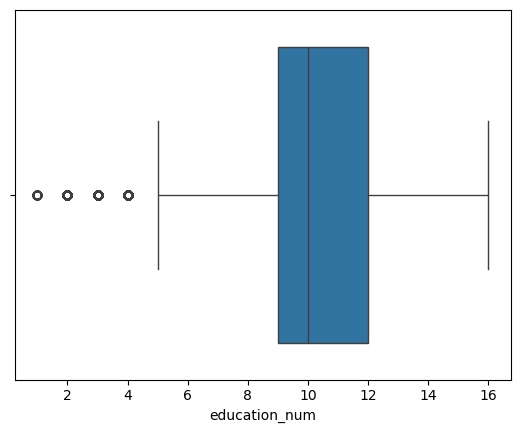

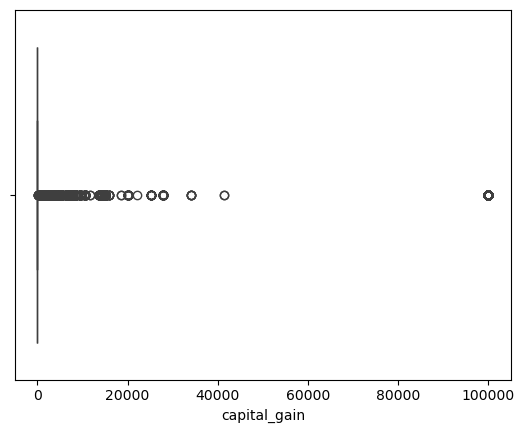

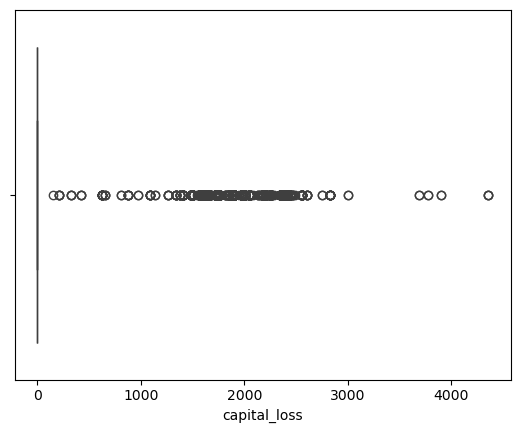

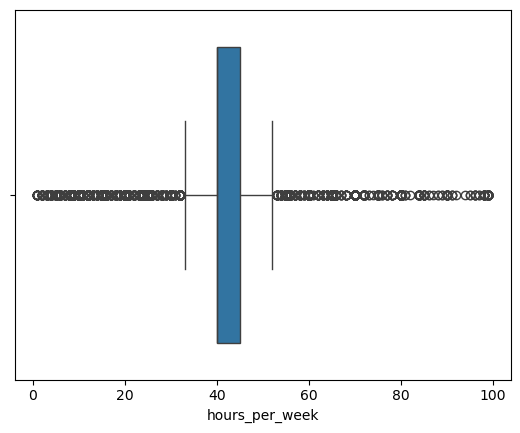

In [104]:
#box-plot to identify the outliers
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include = "number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

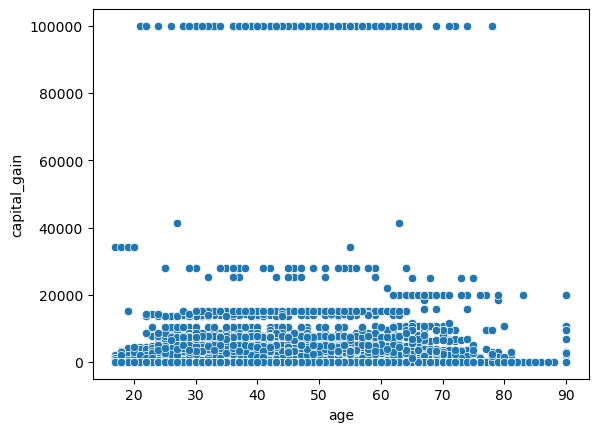

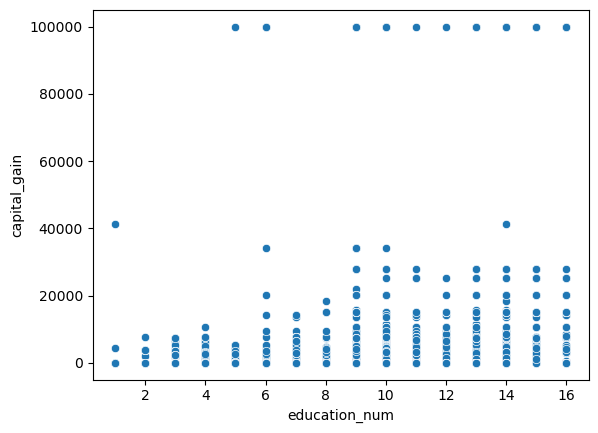

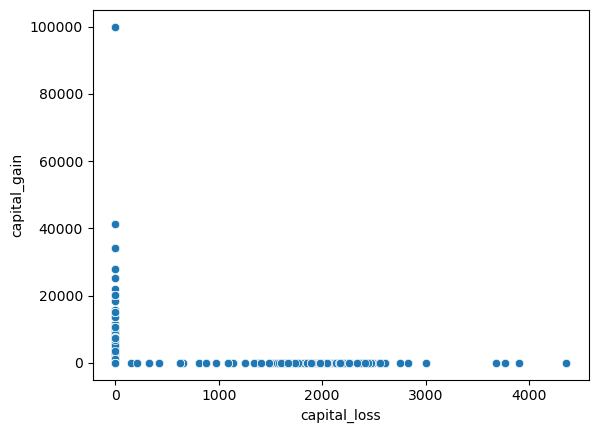

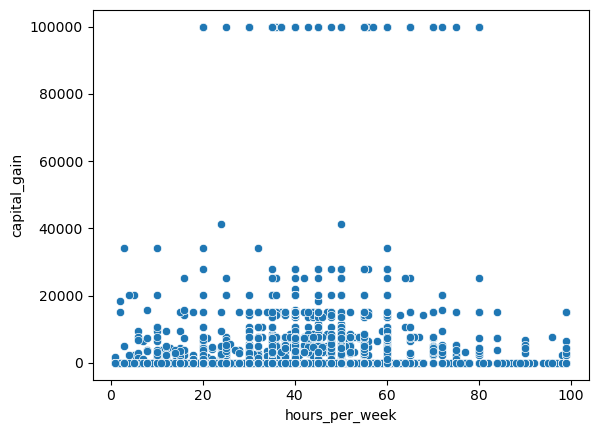

In [107]:
#scatter plot to identify the relationship
for i in ['age', 'education_num','capital_loss',
       'hours_per_week']:
     sns.scatterplot(data=df, x=i, y='capital_gain')
     plt.show()

<Axes: >

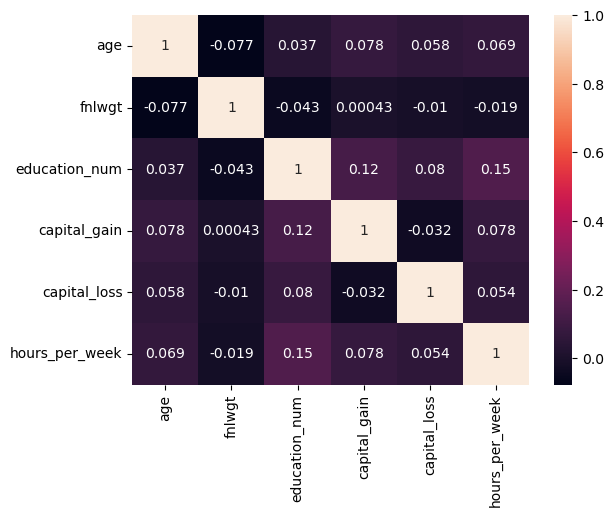

In [109]:
#correlation with heatmap to interpret the relation nd multiollinarity
s=df.select_dtypes(include = "number").corr()
sns.heatmap(s,annot=True)

In [111]:
for i in ["workclass", "occupation", "native_country"]:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [113]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [115]:
df = df.drop(columns=['fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'relationship'])

In [117]:
df.head()

,age,workclass,education,marital_status,occupation,race,sex,hours_per_week,native_country,income
0,39,Government,Bachelors,Unmarried,Adm-clerical,White,Male,40,North America,<=50K
1,50,Self Employeed,Bachelors,Married,Exec-managerial,White,Male,13,North America,<=50K
2,38,Private,HS-grad,Unmarried,Handlers-cleaners,White,Male,40,North America,<=50K
3,53,Private,11th,Married,Handlers-cleaners,Black,Male,40,North America,<=50K
4,28,Private,Bachelors,Married,Prof-specialty,Black,Female,40,North America,<=50K


In [119]:
df = pd.get_dummies(df)

In [121]:
df.head()

,age,hours_per_week,workclass_Government,workclass_Other,workclass_Private,workclass_Self Employeed,education_11th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,...,race_Other,race_White,sex_Female,sex_Male,native_country_Asia,native_country_Europe,native_country_North America,native_country_South America,income_<=50K,income_>50K
0,39,40,True,False,False,False,False,False,False,True,...,False,True,False,True,False,False,True,False,True,False
1,50,13,False,False,False,True,False,False,False,True,...,False,True,False,True,False,False,True,False,True,False
2,38,40,False,False,True,False,False,False,False,False,...,False,True,False,True,False,False,True,False,True,False
3,53,40,False,False,True,False,True,False,False,False,...,False,False,False,True,False,False,True,False,True,False
4,28,40,False,False,True,False,False,False,False,True,...,False,False,True,False,False,False,True,False,True,False


In [123]:
df.shape

(32561, 37)

In [125]:
# Dropping both income columns for feature matrix X
X = df.drop(['income_<=50K', 'income_>50K'], axis=1)

# For the target variable y, you can select one of the income columns
y = df['income_>50K']  # This will contain 1 for '>50K' and 0 for '<=50K'

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [129]:
X_train.shape, X_test.shape

((26048, 35), (6513, 35))

<function matplotlib.pyplot.show(close=None, block=None)>

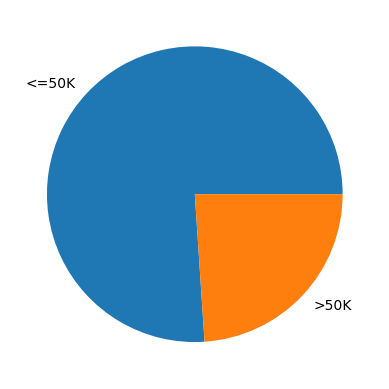

In [131]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]), labels=['<=50K', '>50K'])
plt.show

In [133]:
from imblearn.over_sampling import SMOTE

In [135]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)
print(X_train_smote.shape, y_train_smote.shape)

(39620, 35) (39620,)


In [137]:
y_train_smote.value_counts()

income_>50K
False    19810
True     19810
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

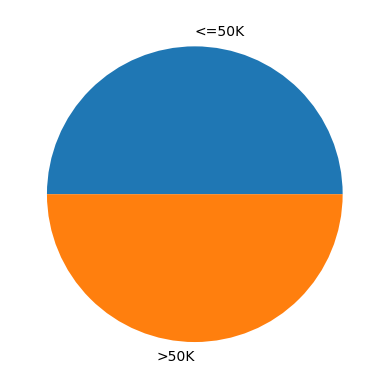

In [139]:
plt.pie(np.array([y_train_smote.value_counts()[0],y_train_smote.value_counts()[1]]), labels=['<=50K', '>50K'])
plt.show

In [141]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores: \n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Validation Scores: \n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

In [143]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_smote, y_train_smote)

y_train_pred = lr.predict(X_train_smote)

training_scores(y_train_smote, y_train_pred)

y_test_pred = lr.predict(X_test)

validation_scores(y_test, y_test_pred)

Training Scores: 
	Accuracy = 0.842
	Precision = 0.845
	Recall = 0.837
	F1-Score = 0.841
Validation Scores: 
	Accuracy = 0.795
	Precision = 0.576
	Recall = 0.628
	F1-Score = 0.601


In [145]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_smote, y_train_smote)

y_train_pred = gnb.predict(X_train_smote)

training_scores(y_train_smote, y_train_pred)

y_test_pred = gnb.predict(X_test)

validation_scores(y_test, y_test_pred)

Training Scores: 
	Accuracy = 0.741
	Precision = 0.679
	Recall = 0.915
	F1-Score = 0.779
Validation Scores: 
	Accuracy = 0.634
	Precision = 0.385
	Recall = 0.813
	F1-Score = 0.523


In [147]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train_smote, y_train_smote)

y_train_pred = rfc.predict(X_train_smote)

training_scores(y_train_smote, y_train_pred)

y_test_pred = rfc.predict(X_test)

validation_scores(y_test, y_test_pred)

Training Scores: 
	Accuracy = 0.969
	Precision = 0.962
	Recall = 0.976
	F1-Score = 0.969
Validation Scores: 
	Accuracy = 0.791
	Precision = 0.574
	Recall = 0.581
	F1-Score = 0.577


In [149]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_smote, y_train_smote)

y_train_pred = dtc.predict(X_train_smote)

training_scores(y_train_smote, y_train_pred)

y_test_pred = dtc.predict(X_test)

validation_scores(y_test, y_test_pred)

Training Scores: 
	Accuracy = 0.969
	Precision = 0.973
	Recall = 0.964
	F1-Score = 0.969
Validation Scores: 
	Accuracy = 0.765
	Precision = 0.521
	Recall = 0.533
	F1-Score = 0.527


In [151]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_smote, y_train_smote)

y_train_pred = svm.predict(X_train_smote)

training_scores(y_train_smote, y_train_pred)

y_test_pred = svm.predict(X_test)

validation_scores(y_test, y_test_pred)

Training Scores: 
	Accuracy = 0.792
	Precision = 0.744
	Recall = 0.889
	F1-Score = 0.81
Validation Scores: 
	Accuracy = 0.727
	Precision = 0.469
	Recall = 0.837
	F1-Score = 0.601


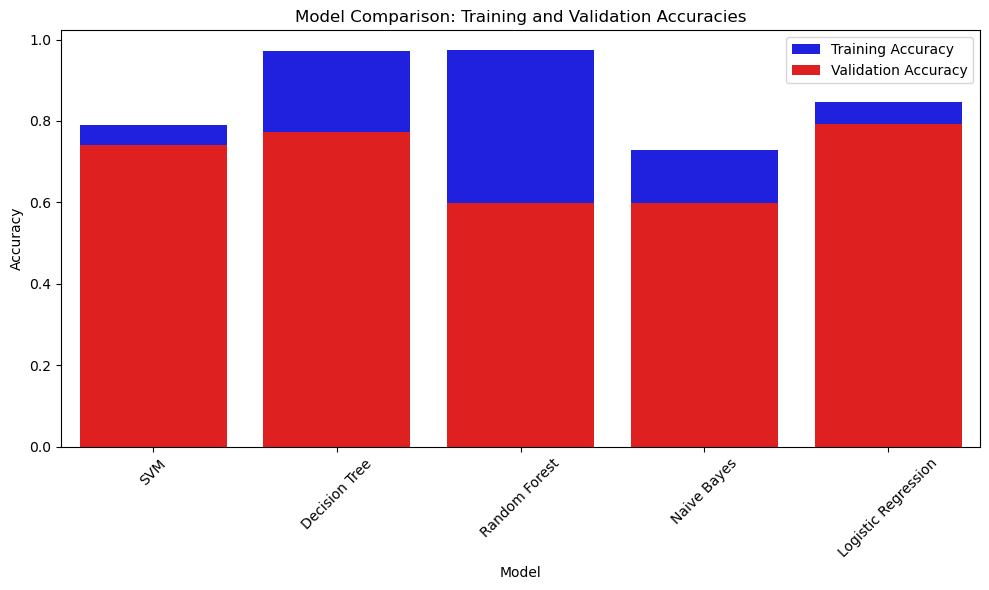

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example dictionary of model accuracies
model_accuracies = {
    'Model': ['SVM', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'Logistic Regression'],
    'Training Accuracy': [0.79, 0.973, 0.974, 0.728, 0.847],  # Replace with actual training accuracy
    'Validation Accuracy': [0.741, 0.772, 0.598, 0.598, 0.792]  # Replace with actual validation accuracy
}

# Convert dictionary to DataFrame
acc_df = pd.DataFrame(model_accuracies)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Training Accuracy', data=acc_df, color='b', label='Training Accuracy')
sns.barplot(x='Model', y='Validation Accuracy', data=acc_df, color='r', label='Validation Accuracy')

# Add titles and labels
plt.title('Model Comparison: Training and Validation Accuracies')
plt.ylabel('Accuracy')
plt.legend()

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [155]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 50, 100],
              'criterion':['gini', 'entropy', 'log_loss']}

grid_obj = GridSearchCV(estimator=rfc, param_grid=parameters)

grid_fit = grid_obj.fit(X_train_smote, y_train_smote)

best_model = grid_fit.best_estimator_

best_model.score(X_test, y_test)

0.7911868570551205

In [157]:
import pickle
with open('predictor_v1.pickle', 'wb') as file:
    pickle.dump(best_model, file)

In [159]:
print(len(X_test.columns))

35


In [161]:
print(len(X_train_smote.columns))

35


In [163]:
X_test.columns

Index(['age', 'hours_per_week', 'workclass_Government', 'workclass_Other',
       'workclass_Private', 'workclass_Self Employeed', 'education_11th',
       'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors',
       'education_HS-grad', 'education_Masters', 'education_Other',
       'education_Some-college', 'marital_status_Married',
       'marital_status_Unmarried', 'occupation_Adm-clerical',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other', 'occupation_Other-service',
       'occupation_Prof-specialty', 'occupation_Sales',
       'occupation_Transport-moving', 'race_Black', 'race_Other', 'race_White',
       'sex_Female', 'sex_Male', 'native_country_Asia',
       'native_country_Europe', 'native_country_North America',
       'native_country_South America'],
      dtype='object')

In [175]:
pred_salary = best_model.predict([[42, 40, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0]])
print(pred_salary)

[ True]


In [165]:
pred_salary = best_model.predict([[40, 60, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0]])
print(pred_salary)

[ True]


In [167]:
pred_salary = best_model.predict([[38, 50, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0]])
print(pred_salary)

[False]


In [173]:
pred_salary = best_model.predict([[40, 50, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
print(pred_salary)

[False]


In [169]:
# Check if the columns are in the same order
if list(X_train_smote.columns) == list(X_test.columns):
    print("The feature columns are in the same order.")
else:
    print("The feature columns are not in the same order!")

The feature columns are in the same order.


In [171]:
print(X_test.shape)  # Should be (n_samples, n_features)

(6513, 35)
